In [1]:
using Plots
include("coevolution_network_base.jl")
using .CoevolutionNetworkBase
using Printf
theme(:dracula)

In [2]:
# Parameters
L = 40.0
dx = 0.05
x = -L/2:dx:L/2-dx
r = 3.0
M = 15
beta = 2.5
alpha = 0.0
gamma = 1.0
# D = 0.0025
D = 0.01
Nh = 4 * 10^6
stochastic = true
sigma = 3.0 

# Initialize viral and immune densities
viral_density = zeros(Float64, length(x))
viral_density[Int(round(length(x)/2))] = 100/dx

# initial_variance = 0.3
# viral_density .= 100/sqrt(2 * pi * initial_variance) .* exp.(-x.^2/2/initial_variance)
viral_density2 = zeros(Float64, length(x))
immune_density = zeros(Float64, length(x))

# Create Population instances
population = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=stochastic, sigma=sigma)
populations = [population]

# populations[1] = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=true)

# Create Network instance
migration_matrix = 1e-5 * ones(size(populations,1),size(populations,1)) # Define an appropriate migration matrix
println(size(migration_matrix,1))
network = Network(populations, migration_matrix);

# Create Simulation instance
dt = 0.05 # Define an appropriate time step size
duration = 80.0 # Define an appropriate simulation duration
simulation = Simulation(network, dt, duration; thin_by=1);

@time run_simulation!(simulation);

total_infected_per_deme = calculate_total_infected_per_deme(simulation)
println(total_infected_per_deme[1,end] > 0)

1
  0.588267 seconds (1.60 k allocations: 9.973 MiB)
true


1
  0.740304 seconds (1.60 k allocations: 9.973 MiB, 5.43% gc time)
1
  0.538300 seconds (1.60 k allocations: 9.973 MiB)
1
  0.458449 seconds (1.60 k allocations: 9.973 MiB)
1
  1.012901 seconds (1.60 k allocations: 9.973 MiB)
1
  1.000502 seconds (1.60 k allocations: 9.973 MiB)
1
  1.018290 seconds (1.60 k allocations: 9.973 MiB, 6.87% gc time)
1
  0.554213 seconds (1.60 k allocations: 9.973 MiB)
1
  0.517579 seconds (1.60 k allocations: 9.973 MiB)
1
  0.338076 seconds (1.60 k allocations: 9.973 MiB)
1
  0.387661 seconds (1.60 k allocations: 9.973 MiB)


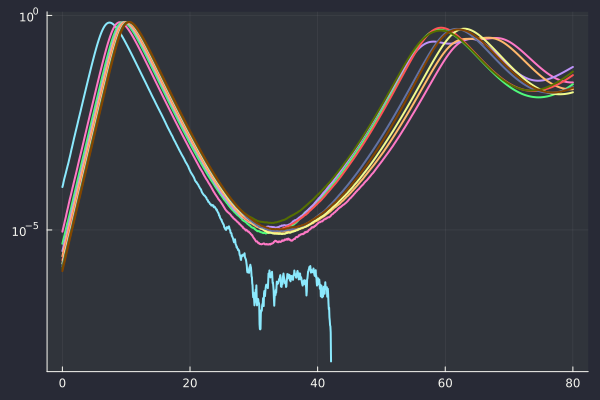

In [6]:
Nh_values = collect(1:10:100) .* 10^6
p = plot()
for Nh_idx in eachindex(Nh_values)
    # Parameters
    L = 40.0
    dx = 0.05
    x = -L/2:dx:L/2-dx
    r = 3.0
    M = 15
    beta = 2.5
    alpha = 0.0
    gamma = 1.0
    # D = 0.0025
    D = 0.01
    Nh = Nh_values[Nh_idx]
    stochastic = true
    sigma = 3.0 

    # Initialize viral and immune densities
    viral_density = zeros(Float64, length(x))
    viral_density[Int(round(length(x)/2))] = 100/dx

    # initial_variance = 0.3
    # viral_density .= 100/sqrt(2 * pi * initial_variance) .* exp.(-x.^2/2/initial_variance)
    viral_density2 = zeros(Float64, length(x))
    immune_density = zeros(Float64, length(x))

    # Create Population instances
    population = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=stochastic, sigma=sigma)
    populations = [population]

    # populations[1] = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=true)

    # Create Network instance
    migration_matrix = 1e-5 * ones(size(populations,1),size(populations,1)) # Define an appropriate migration matrix
    println(size(migration_matrix,1))
    network = Network(populations, migration_matrix);

    # Create Simulation instance
    dt = 0.05 # Define an appropriate time step size
    duration = 80.0 # Define an appropriate simulation duration
    simulation = Simulation(network, dt, duration; thin_by=1);

    @time run_simulation!(simulation);

    total_infected = calculate_total_infected(simulation)
    reg = total_infected .> 0
    plot!(p,simulation.duration_times[reg], total_infected[reg] / Nh, lw=2, yscale=:log10,
    label=:none)
end

display(p)